# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [122]:
!chmod 600 /content/kaggle.json

! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d mohitkumar282/used-car-dataset

chmod: cannot access '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mohitkumar282/used-car-dataset
License(s): CC0-1.0
used-car-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [123]:
#Import Libary
import numpy as np
import zipfile as zf
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [124]:
zipfile = zf.ZipFile('/content/used-car-dataset.zip')
zipfile.extractall('/content')
zipfile.close()

In [125]:
df  = pd.read_csv('/content/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [126]:
#Menampilkan info seputar datasetnya
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [127]:
df.describe(include='number')

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [128]:
#menamppilkan analisis deskriptif dari dataset untuk kolom kategorikal
df.describe(include='object')

,Brand,model,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
count,9582,9582,9535,9582,9582,9582,9582,9582,9582
unique,39,400,1910,2,2,3,12,7307,1330
top,Maruti Suzuki,City,"65,000 km",Manual,first,Diesel,Nov-24,"BMW 5 Series 3.0 530D M Sport, 2016, Diesel","₹ 4,50,000"
freq,2720,330,198,4800,4800,3840,8693,26,134


In [129]:
#Mengecek jumlah baris dan kolom
df.shape

(9582, 11)

In [130]:
#memahami struktur datanya
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


*Data* berisi 11 kolom, 9 kolom kategorikal dan 2 kolom numerik. Jumlah dari data diatas sebanyak 9582.

In [131]:
#Mengubah colom kmDriven dan AskPrice menjadi format angka
if 'kmDriven' in df.columns:
    df['kmDriven'] = df['kmDriven'].str.replace(",", "").str.replace(" km", "").astype(float)

# Membersihkan 'AskPrice' dari simbol mdf uang dan tanda koma
if 'AskPrice' in df.columns:
    df['AskPrice'] = df['AskPrice'].str.replace("₹", "").str.replace(",", "").astype(float)

# Menampilkan dfset setelah transformasi
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...",195000.0
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...",375000.0
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...",184999.0
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000.0
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol",685000.0


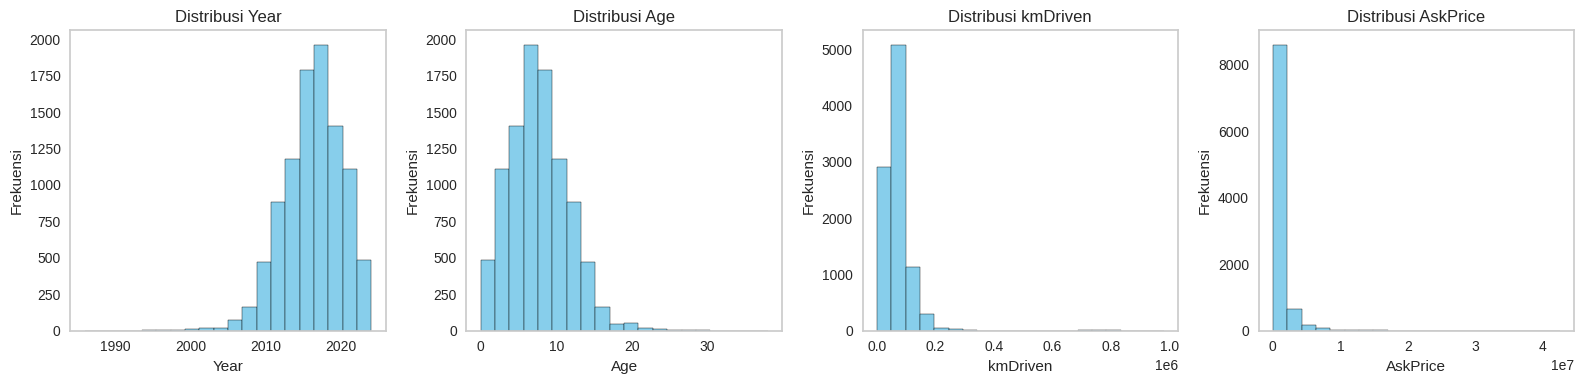

In [132]:
# Statistik deskriptif untuk data numerik
# print("\nStatistik deskriptif kolom numerik:")
# print(df.describe(include='number'))

# Visualisasi distribusi variabel numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Menentukan jumlah baris dan kolom untuk grid layout
n_cols = 4  # Jumlah grafik per baris
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Mengubah array axes menjadi 1D untuk iterasi

# Loop untuk setiap kolom numerik
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frekuensi")
    axes[i].grid(False)

# Menonaktifkan axis yang tidak terpakai jika jumlah kolom tidak habis dibagi 4
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Menampilkan plot
plt.tight_layout()
plt.show()


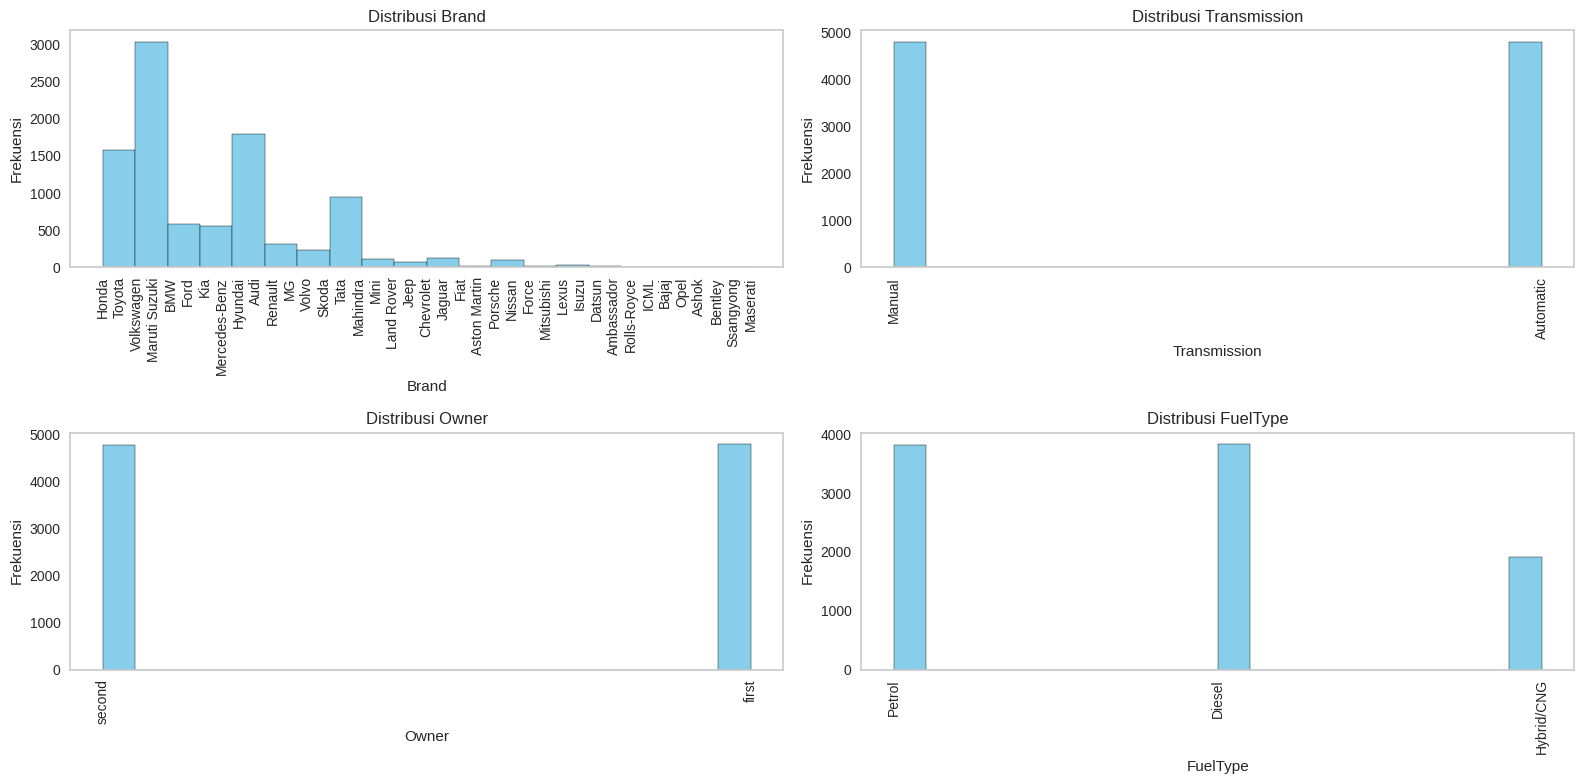

In [133]:
# Visualisasi distribusi variabel kategorikal
categorical_columns = df[['Brand', 'Transmission', 'Owner', 'FuelType']].columns

n_cols = 2  # Jumlah grafik per baris
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Mengubah array axes menjadi 1D untuk iterasi

# Loop untuk setiap kolom kategorikal
for i, column in enumerate(categorical_columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frekuensi")
    axes[i].grid(False)
    axes[i].tick_params(axis='x', rotation=90)  # Membuat label sumbu x miring

# Menonaktifkan axis yang tidak terpakai jika jumlah kolom tidak habis dibagi 4
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

# Menampilkan plot
plt.tight_layout()
plt.show()


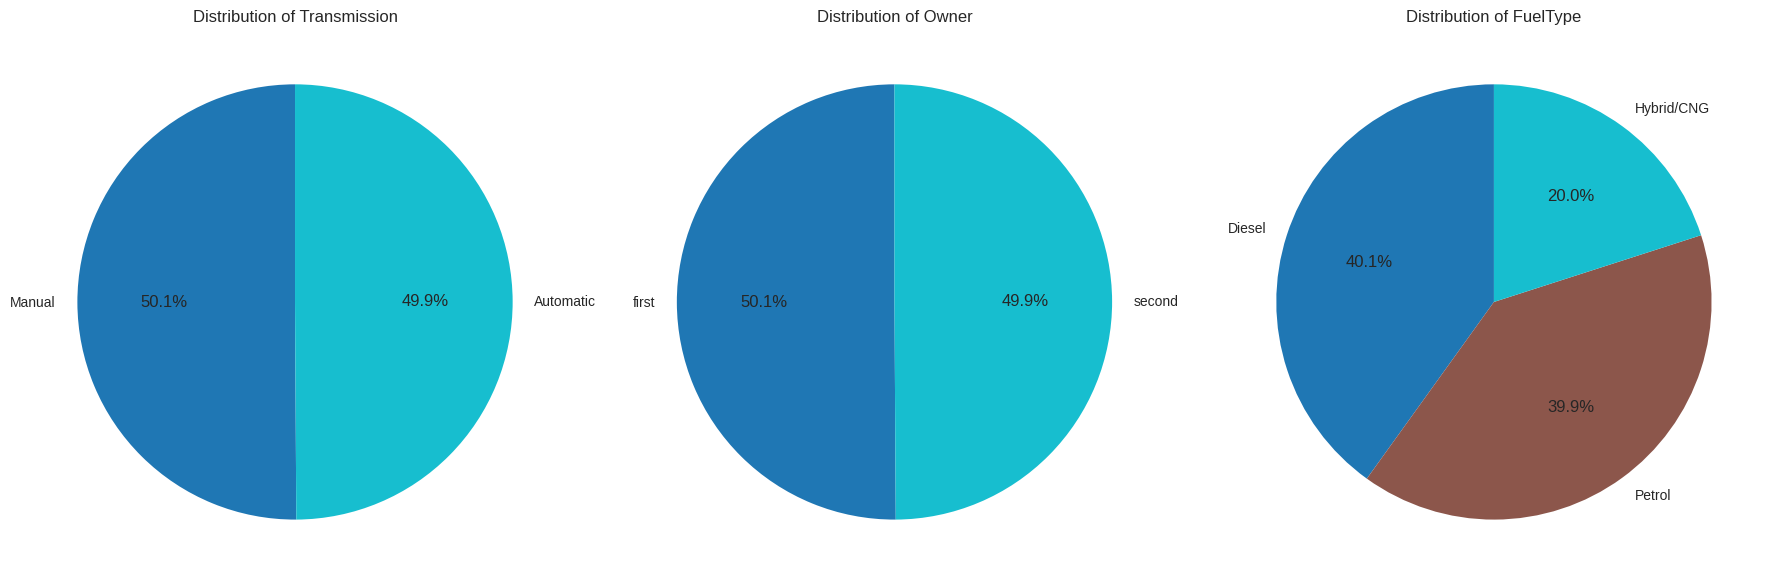

In [134]:
#Membuat pie chart untuk kolom kategorikal

# Membuat pie chart untuk setiap kolom kategorikal (3 per baris)
categorical_columns = df[['Transmission', 'Owner', 'FuelType']].columns
n_cols = 3
n_rows = int(np.ceil(len(categorical_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))
axes = axes.flatten()  # Mengubah array axes menjadi 1D untuk iterasi

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')

# Menonaktifkan axes yang tidak terpakai
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

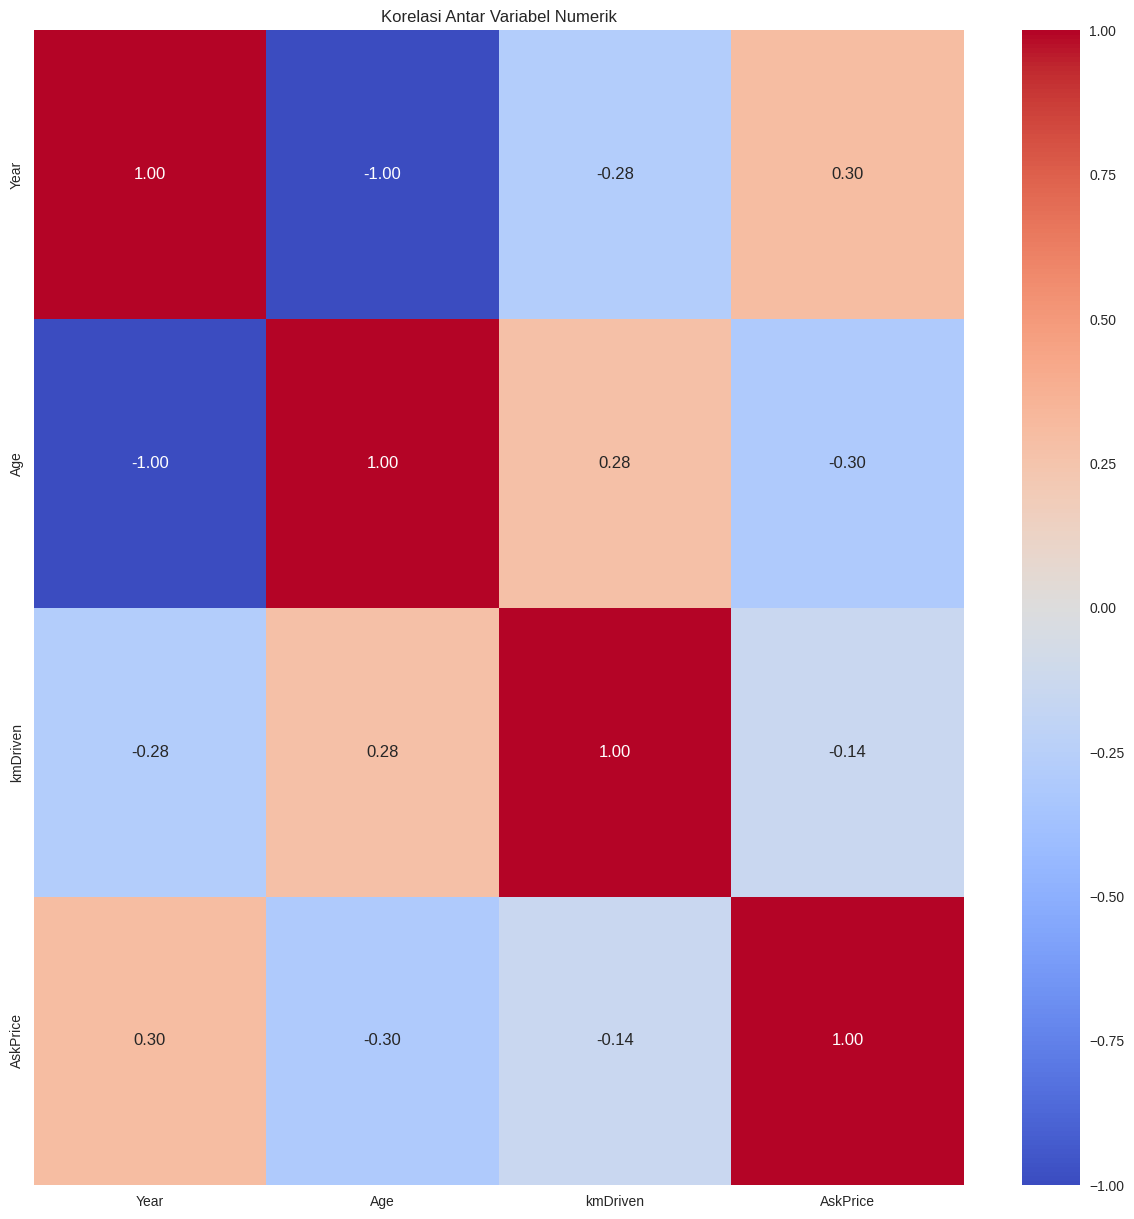

In [135]:
#Korelasi antar variabel numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [136]:
#Mengecek data duplikat
df.duplicated().sum()

731

In [137]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [138]:
#Mengecek data yang kosong
df.isnull().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,46
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


In [139]:
#Mengisi kolom kmDriven yang kosong dengan median
df['kmDriven'].fillna(df['kmDriven'].median(), inplace=True)
#Mengecek data yang kosong
df.isnull().sum()

<ipython-input-139-6123ee363b63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kmDriven'].fillna(df['kmDriven'].median(), inplace=True)


,0
Brand,0
model,0
Year,0
Age,0
kmDriven,0
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


In [140]:
#Menghapus kolom yang tidak perlu (PostedDate, AdditionInfo dan model)
df.drop(['PostedDate', 'AdditionInfo', 'model'], axis=1, inplace=True)
df.head()


,Brand,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,2001,23,98000.0,Manual,second,Petrol,195000.0
1,Toyota,2009,15,190000.0,Manual,second,Diesel,375000.0
2,Volkswagen,2010,14,77246.0,Manual,first,Diesel,184999.0
3,Maruti Suzuki,2017,7,83500.0,Manual,second,Diesel,565000.0
4,Maruti Suzuki,2019,5,45000.0,Automatic,first,Petrol,685000.0


In [141]:
#Cek brp data yang unik di setiap kolom
df.nunique()

,0
Brand,39
Year,32
Age,32
kmDriven,1745
Transmission,2
Owner,2
FuelType,3
AskPrice,1330


    Feature  Outliers Count  Lower Bound  Upper Bound  \
0      Year             133       2006.5       2026.5   
1       Age             133         -2.5         17.5   
2  kmDriven             338     -20682.5     150009.5   
3  AskPrice             838    -737500.0    2162500.0   

                                     Outlier Indices  
0  [0, 125, 137, 204, 264, 271, 404, 508, 547, 64...  
1  [0, 125, 137, 204, 264, 271, 404, 508, 547, 64...  
2  [1, 6, 43, 49, 58, 89, 117, 125, 129, 172, 195...  
3  [7, 11, 14, 20, 29, 32, 38, 57, 63, 80, 81, 83...  


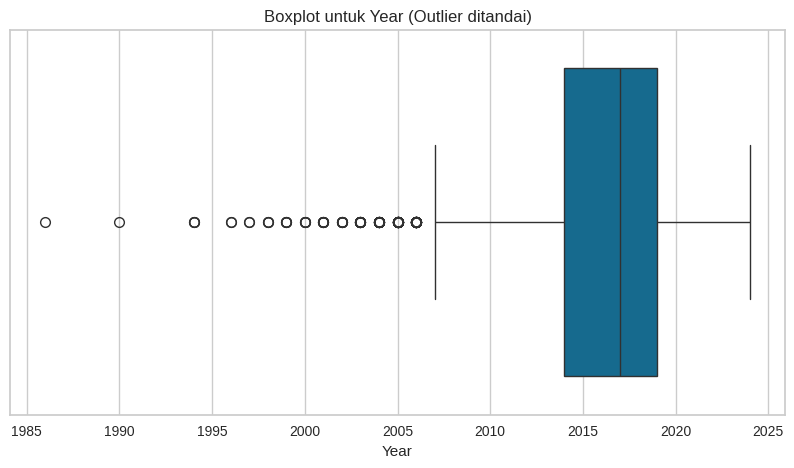

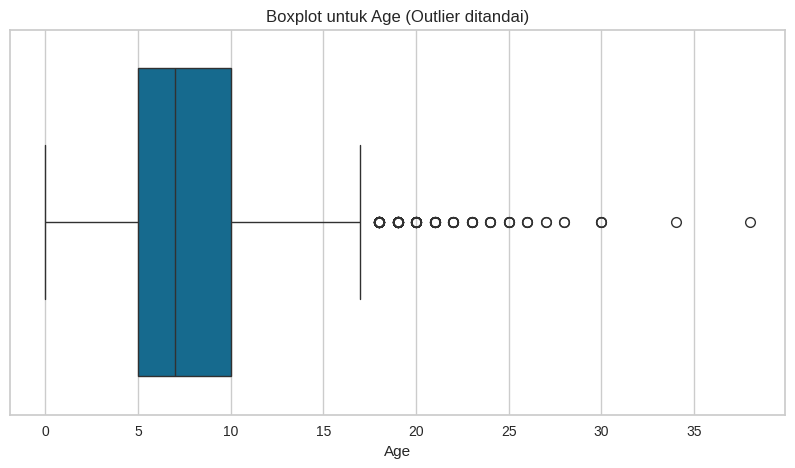

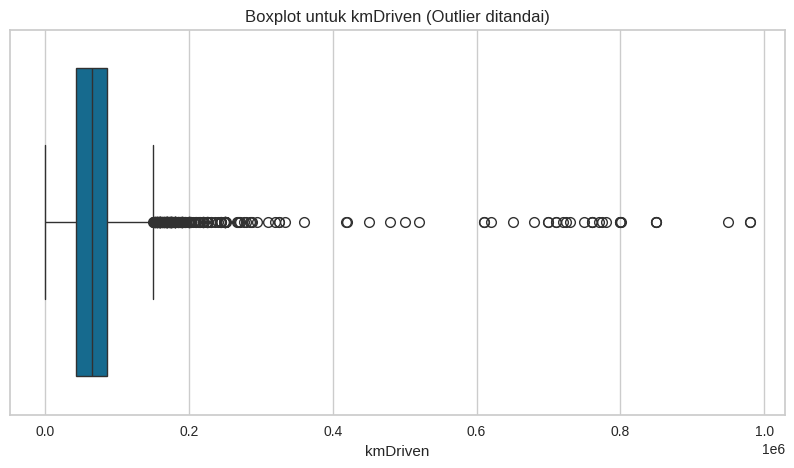

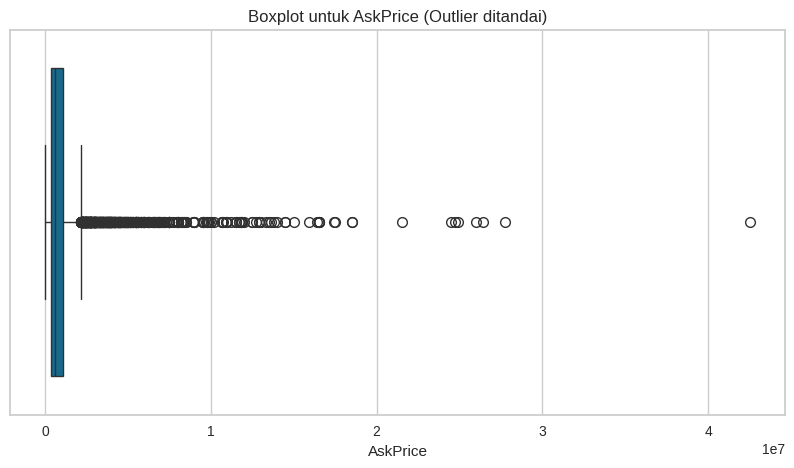

In [142]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# Deteksi outlier menggunakan IQR
outlier_summary = []

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    num_outliers = len(outlier_indices)

    # Menyimpan hasil ke list
    outlier_summary.append({
        "Feature": col,
        "Outliers Count": num_outliers,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Indices": outlier_indices.tolist()
    })

# Mengubah hasil ke DataFrame untuk lebih mudah dibaca
outlier_df = pd.DataFrame(outlier_summary)

# Menampilkan tabel hasil deteksi outlier
print(outlier_df)
# Opsional: Visualisasi Outlier
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot untuk {col} (Outlier ditandai)")
    plt.show()

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan


In [143]:
#Encoding data kategorical dengan label Encoder
label_encoder = LabelEncoder()
df_encoded = df.copy()
categorical_columns = df_encoded[['Transmission', 'Owner', 'FuelType']].columns
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded.head()

,Brand,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,2001,23,98000.0,1,1,2,195000.0
1,Toyota,2009,15,190000.0,1,1,0,375000.0
2,Volkswagen,2010,14,77246.0,1,0,0,184999.0
3,Maruti Suzuki,2017,7,83500.0,1,1,0,565000.0
4,Maruti Suzuki,2019,5,45000.0,0,0,2,685000.0


In [144]:
#Normalisasi data kategorical
scaler = StandardScaler()
df_normalized = df_encoded.copy()
numerical_features = df_normalized.select_dtypes(include=['int64', 'float64']).columns
df_normalized[numerical_features] = scaler.fit_transform(df_normalized[numerical_features])
# print(numerical_features)
df_normalized.head()


,Brand,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,-3.720264,3.720264,0.475192,0.947914,1.038358,1.121954,-0.511270
1,Toyota,-1.784856,1.784856,2.093158,0.947914,1.038358,-1.121700,-0.402185
2,Volkswagen,-1.542930,1.542930,0.110200,0.947914,-0.963059,-1.121700,-0.517331
3,Maruti Suzuki,0.150551,-0.150551,0.220187,0.947914,1.038358,-1.121700,-0.287041
4,Maruti Suzuki,0.634403,-0.634403,-0.456897,-1.054948,-0.963059,1.121954,-0.214317


In [145]:
#Normalisasi dengan minmaxscaller
from sklearn.preprocessing import MinMaxScaler
df_normalized_minmax = df_encoded.copy()
numerical_features = df_normalized_minmax.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_normalized_minmax[numerical_features] = scaler.fit_transform(df_normalized_minmax[numerical_features])
df_normalized_minmax.head()

,Brand,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,0.394737,0.605263,0.100000,1.0,1.0,1.0,0.004237
1,Toyota,0.605263,0.394737,0.193877,1.0,1.0,0.0,0.008474
2,Volkswagen,0.631579,0.368421,0.078822,1.0,0.0,0.0,0.004001
3,Maruti Suzuki,0.815789,0.184211,0.085204,1.0,1.0,0.0,0.012946
4,Maruti Suzuki,0.868421,0.131579,0.045918,0.0,0.0,1.0,0.015770


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

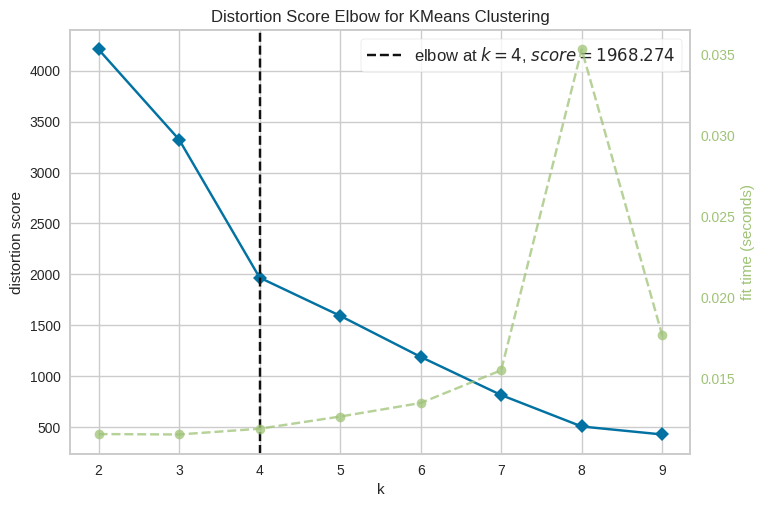

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
#Menggunakan algoritma Kmeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
features = df_normalized_minmax.select_dtypes(include=['int64', 'float64']).columns
visualizer.fit(df_normalized_minmax[features])
visualizer.show()

In [147]:
#Buat dengan metode kmean
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_normalized_minmax[features])
labels = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [149]:
#Evaluasi cluster
silhouette_avg = silhouette_score(df_normalized_minmax[features], labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5277632855684388


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [150]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)

rfe.fit(df_normalized_minmax[features], labels)
selected_features = df_normalized_minmax[features].columns[rfe.support_]

print("Fitur yang dipilih:", selected_features)


Fitur yang dipilih: Index(['Year', 'Age', 'kmDriven', 'Transmission', 'Owner', 'AskPrice'], dtype='object')


In [151]:
selected_features.tolist()

['Year', 'Age', 'kmDriven', 'Transmission', 'Owner', 'AskPrice']

In [152]:
df_selected = df_normalized_minmax[selected_features]
df_selected.head()

,Year,Age,kmDriven,Transmission,Owner,AskPrice
0,0.394737,0.605263,0.100000,1.0,1.0,0.004237
1,0.605263,0.394737,0.193877,1.0,1.0,0.008474
2,0.631579,0.368421,0.078822,1.0,0.0,0.004001
3,0.815789,0.184211,0.085204,1.0,1.0,0.012946
4,0.868421,0.131579,0.045918,0.0,0.0,0.015770


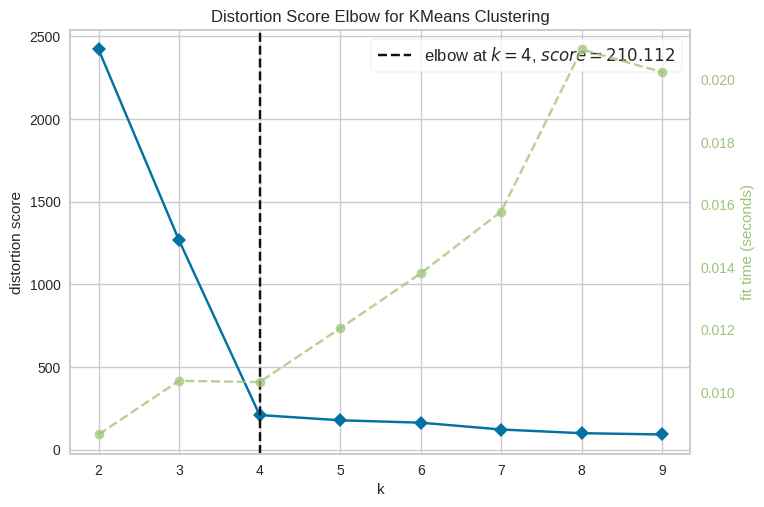

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_selected)
visualizer.show()

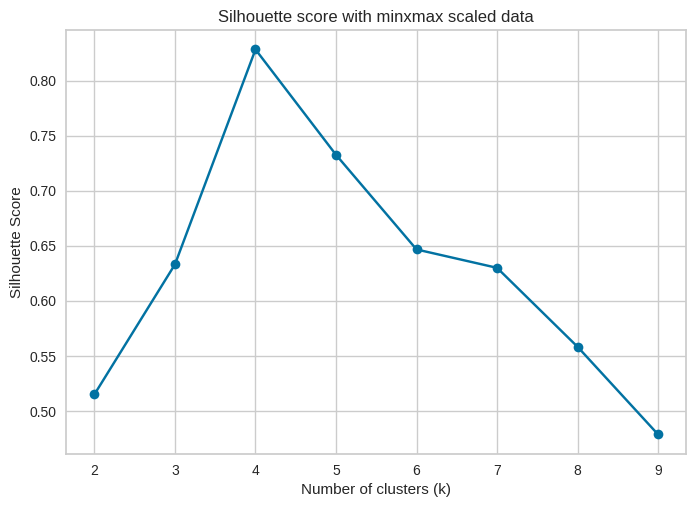

In [154]:
# Range of k values
k_values = range(2, 10)  # Silhouette requires at least 2 clusters
silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_selected)
    score = silhouette_score(df_selected, km.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score with minxmax scaled data')
plt.show()

In [155]:
# Tentukan jumlah cluster
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_selected)
labels_after_feature_selection = kmeans.labels_

# Prediksi Cluster
clusters = kmeans.predict(df_selected)
# print("Hasil cluster untuk setiap data:", clusters)

# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(df_selected, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.828308659326896


Setelah menerapkan *feature selection*, *silhoutte score* meningkat menjadi **0.828**

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

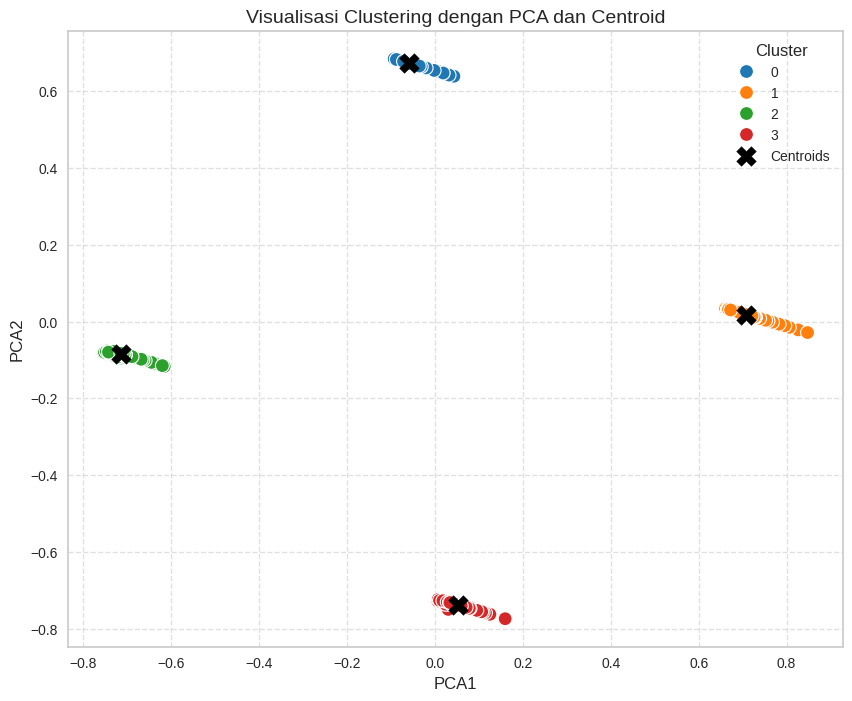

In [156]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)

# Membuat DataFrame baru untuk hasil PCA dan label cluster
pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels_after_feature_selection

# Menghitung centroid setiap cluster
centroids = pca_df.groupby('Cluster')[['PCA1', 'PCA2']].mean()

# Plot hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='tab10', s=100
)

# Menambahkan centroid ke plot
plt.scatter(
    centroids['PCA1'],
    centroids['PCA2'],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('Visualisasi Clustering dengan PCA dan Centroid', fontsize=14)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

<Figure size 1000x600 with 0 Axes>

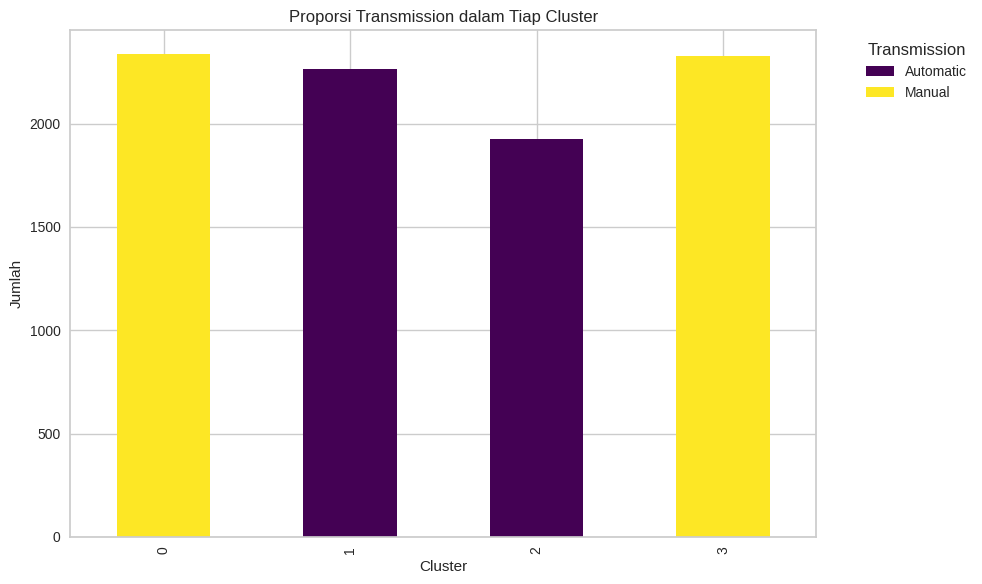

<Figure size 1000x600 with 0 Axes>

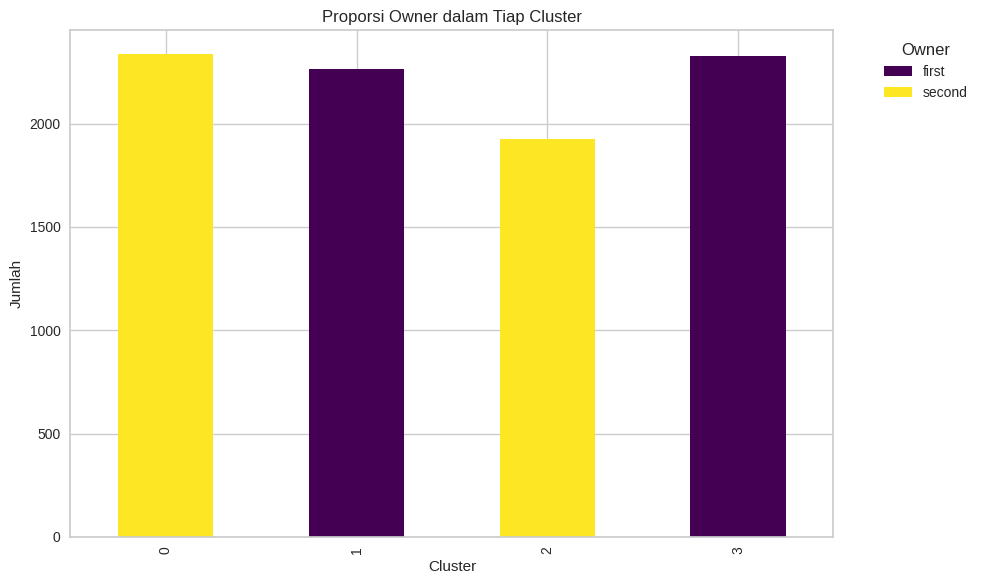

<ipython-input-157-863e60a1e9bb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')


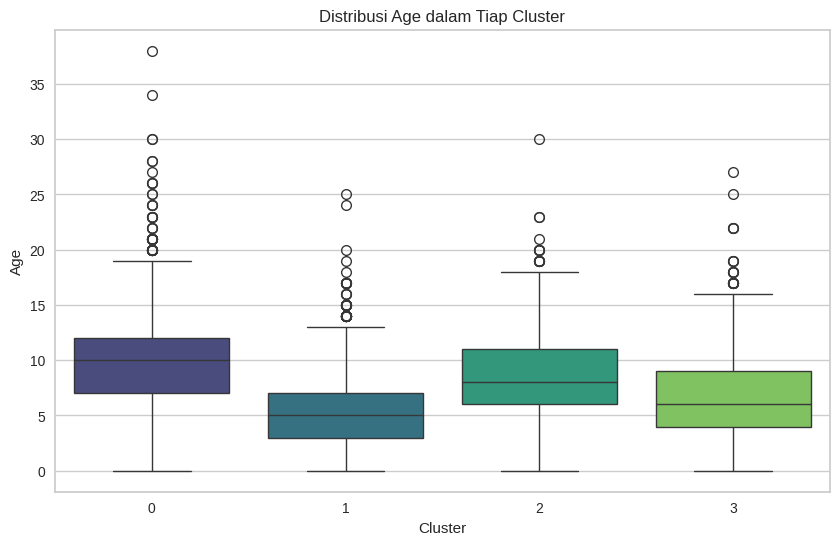

<ipython-input-157-863e60a1e9bb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')


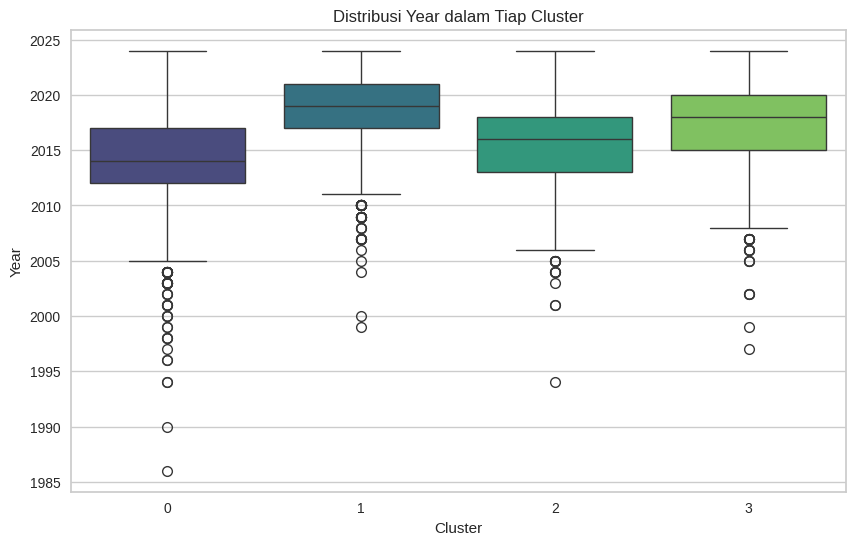

<ipython-input-157-863e60a1e9bb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')


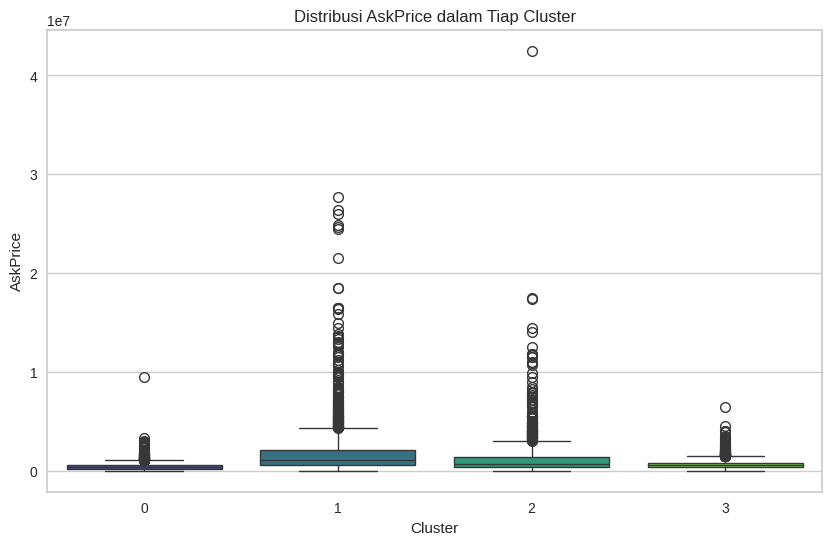

<ipython-input-157-863e60a1e9bb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')


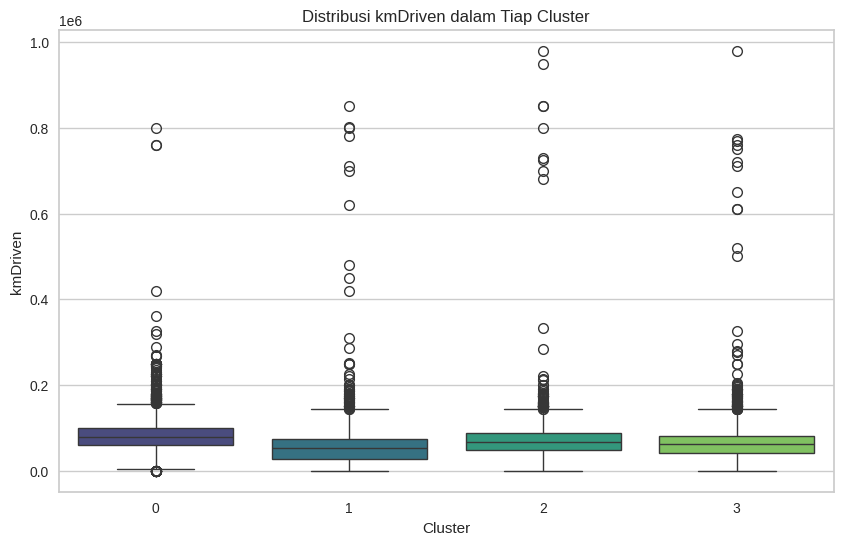

In [157]:
# Menambahkan label cluster ke dalam dataframe asli
df['Cluster'] = labels  # Menambahkan kolom hasil clustering

# Daftar kolom untuk dianalisis
categorical_columns = ['Transmission', 'Owner']
numerical_columns = ['Age', 'Year', 'AskPrice','kmDriven']

# Visualisasi kolom kategorikal dengan bar chart
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    cluster_categorical = df.groupby(['Cluster', column]).size().unstack(fill_value=0)
    cluster_categorical.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Proporsi {column} dalam Tiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Jumlah')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Visualisasi kolom numerikal dengan boxplot
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')
    plt.title(f'Distribusi {column} dalam Tiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()


In [158]:
# Menentukan kolom numerikal dan kategorikal
categorical_columns = ['Transmission', 'Owner']
numerical_columns = ['Age', 'Year', 'AskPrice','kmDriven']

# Menghitung rata-rata untuk kolom numerikal
numerical_avg = df.groupby('Cluster')[numerical_columns].mean()

# Menghitung proporsi untuk kolom kategorikal
categorical_avg = {}
for column in categorical_columns:
    categorical_avg[column] = df.groupby(['Cluster', column]).size().unstack(fill_value=0).apply(
        lambda x: x / x.sum(), axis=1
    )

# Menampilkan rata-rata untuk kolom numerikal
print("Rata-rata Kolom Numerikal per Cluster:")
print(numerical_avg)

# Menampilkan proporsi kategori dalam bentuk tabel
print("\nProporsi Kolom Kategorikal per Cluster:")
for column, prop in categorical_avg.items():
    print(f"\n{column}:")
    print(prop)

# # Visualisasi rata-rata numerikal per cluster
# numerical_avg.plot(kind='bar', figsize=(12, 6), colormap='viridis')
# plt.title('Rata-rata Numerikal per Cluster')
# plt.xlabel('Cluster')
# plt.ylabel('Rata-rata Nilai')
# plt.legend(title='Fitur', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # Visualisasi proporsi kategorikal per cluster
# for column, prop in categorical_avg.items():
#     prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
#     plt.title(f'Proporsi {column} per Cluster')
#     plt.xlabel('Cluster')
#     plt.ylabel('Proporsi')
#     plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()


Rata-rata Kolom Numerikal per Cluster:
               Age         Year      AskPrice      kmDriven
Cluster                                                    
0        10.032548  2013.967452  4.457364e+05  84388.493362
1         5.387638  2018.612362  1.863354e+06  57578.681236
2         8.553015  2015.446985  1.234951e+06  73880.562370
3         6.609368  2017.390632  6.685437e+05  68170.862484

Proporsi Kolom Kategorikal per Cluster:

Transmission:
Transmission  Automatic  Manual
Cluster                        
0                   0.0     1.0
1                   1.0     0.0
2                   1.0     0.0
3                   0.0     1.0

Owner:
Owner    first  second
Cluster               
0          0.0     1.0
1          1.0     0.0
2          0.0     1.0
3          1.0     0.0


# **Interpretasi Hasil Clustering**

Berikut adalah analisis karakteristik masing-masing cluster berdasarkan rata-rata kolom numerikal dan proporsi kolom kategorikal:  

## **Cluster 0**
- **Karakteristik:**  
  - *Age*: 10.03 | *Year*: 2013.97 | *AskPrice*: 445,736.4 | *kmDriven*: 84,388.49  
  - Transmission: 100% *Manual*  
  - Owner: 100% *second*  
- **Kesimpulan:**  
  Cluster ini mewakili kendaraan paling tua, dengan tahun produksi paling lama, menggunakan transmisi manual, dimiliki oleh pemilik kedua, memiliki harga terendah, dan jarak tempuh tertinggi.  

---

## **Cluster 1**
- **Karakteristik:**  
  - *Age*: 5.39 | *Year*: 2018.61 | *AskPrice*: 1,863,354 | *kmDriven*: 57,578.68  
  - Transmission: 100% *Automatic*  
  - Owner: 100% *first*  
- **Kesimpulan:**  
  Cluster ini mewakili kendaraan paling muda, dengan tahun produksi terbaru, menggunakan transmisi otomatis, dimiliki oleh pemilik pertama, memiliki harga tertinggi, dan jarak tempuh paling rendah.  

---

## **Cluster 2**
- **Karakteristik:**  
  - *Age*: 8.55 | *Year*: 2015.45 | *AskPrice*: 1,234,951 | *kmDriven*: 73,880.56  
  - Transmission: 100% *Automatic*  
  - Owner: 100% *second*  
- **Kesimpulan:**  
  Cluster ini mewakili kendaraan dengan usia menengah, tahun produksi yang relatif lama, menggunakan transmisi otomatis, dimiliki oleh pemilik kedua, dan memiliki harga yang sedang dengan jarak tempuh yang cukup tinggi.  

---

## **Cluster 3**
- **Karakteristik:**  
  - *Age*: 6.61 | *Year*: 2017.39 | *AskPrice*: 668,543.7 | *kmDriven*: 68,170.86  
  - Transmission: 100% *Manual*  
  - Owner: 100% *first*  
- **Kesimpulan:**  
  Cluster ini mewakili kendaraan dengan usia relatif muda, tahun produksi cukup baru, menggunakan transmisi manual, dimiliki oleh pemilik pertama, dengan harga yang lebih rendah dan jarak tempuh sedang.  

---

## **Kesimpulan:**
1. Cluster 1 menunjukkan kendaraan terbaru dengan harga tertinggi, transmisi otomatis, dan jarak tempuh paling rendah.  
2. Cluster 0 mencerminkan kendaraan yang paling tua, dengan harga terendah, transmisi manual, dan jarak tempuh tertinggi.  
3. Status kepemilikan (*Owner*) tampaknya berhubungan dengan usia kendaraan, di mana kendaraan yang lebih tua lebih sering dimiliki oleh pemilik kedua.  
4. Kendaraan dengan transmisi otomatis cenderung lebih baru dan memiliki harga yang lebih tinggi dibandingkan dengan kendaraan dengan transmisi manual.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [159]:
# Menambahkan label cluster ke dalam dataframe
df_clustered = df_selected.copy()
df_clustered['Cluster'] = labels

# Menyimpan dataframe ke dalam file CSV
output_file = 'clustered_data.csv'
df_clustered.to_csv(output_file, index=False)

print(f"File hasil clustering telah disimpan dengan nama '{output_file}'")


File hasil clustering telah disimpan dengan nama 'clustered_data.csv'
